<a href="https://colab.research.google.com/github/Kyleho1/ML-work/blob/main/ML_Prediction_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned


* Predictive ML models
* Random Forest Model, fine tuning model for better accuracy
* more practice with numpy, pandas, sklearn, seaborn
*   Feature Engineering, statistical analysis and normalization.



In [ ]:
from google.colab import files

# Upload data.csv from your local machine
uploaded = files.upload()

Saving housing.csv to housing.csv


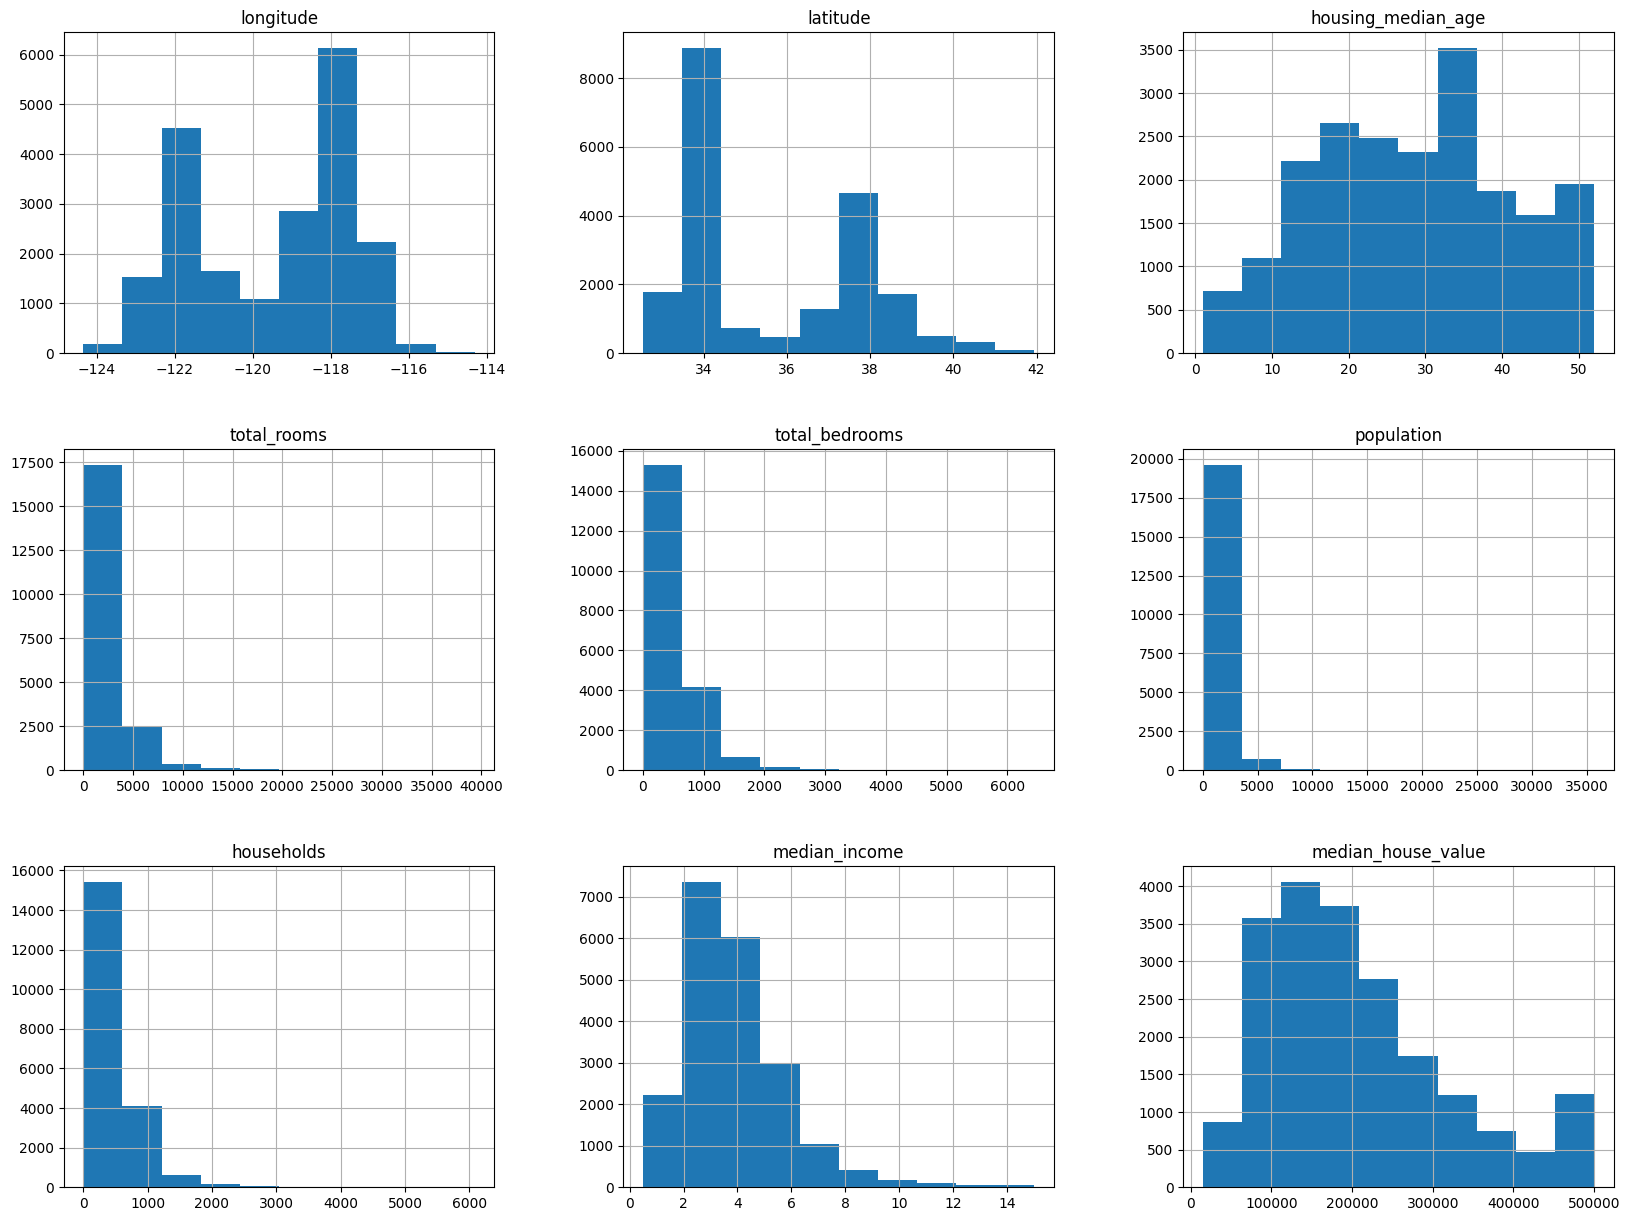

In [ ]:
#clean and create train data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the uploaded CSV file into a DataFrame and remove nulls/dupes
df = pd.read_csv('housing.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#Ocean proximity was strings and we need numbers so grab unique values turn them into columns
df = df.join(pd.get_dummies(df['ocean_proximity']))
df.drop('ocean_proximity', axis=1, inplace=True)

#Check for skewed Data
df.hist(figsize=(20,15))

#Normalize skewed data
df['total_rooms'] = (np.log1p(df['total_rooms'])+1)
df['total_bedrooms'] = (np.log1p(df['total_bedrooms'])+1)
df['population'] = (np.log1p(df['population'])+1)
df['households'] = (np.log1p(df['households'])+1)

#Create Train/Test Data
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

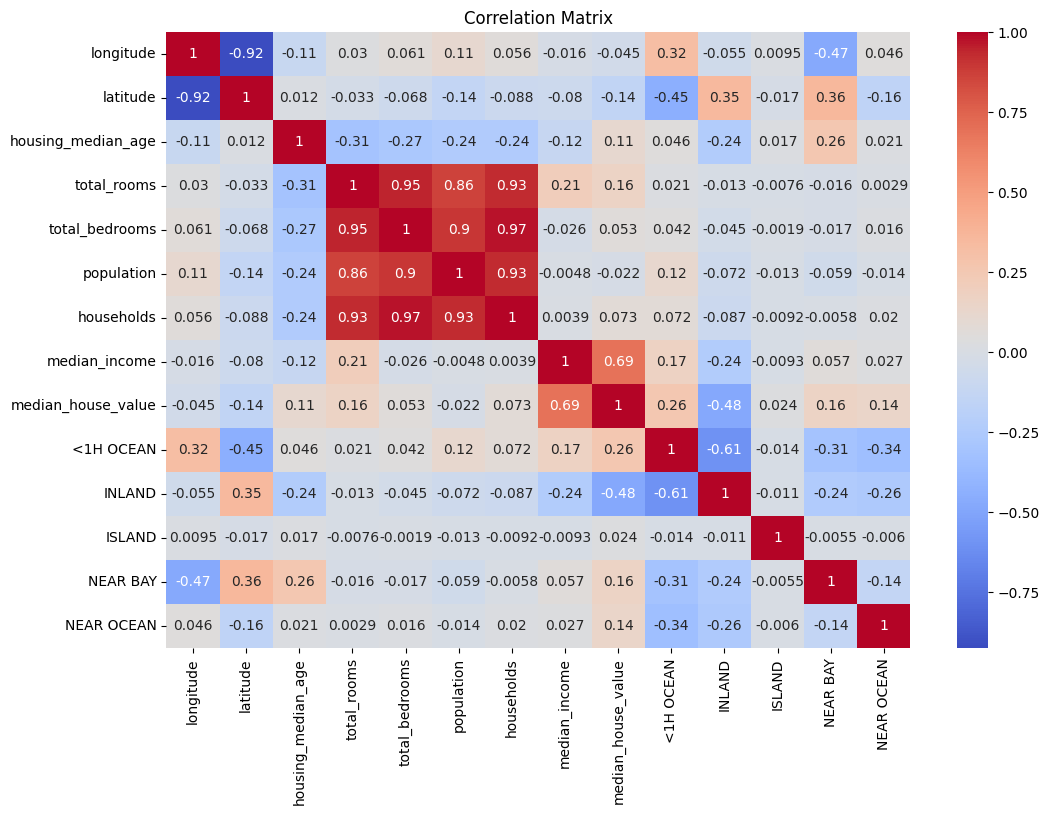

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.show()
#Create Correlation Matrix - to see what values are heavily weighted/not
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

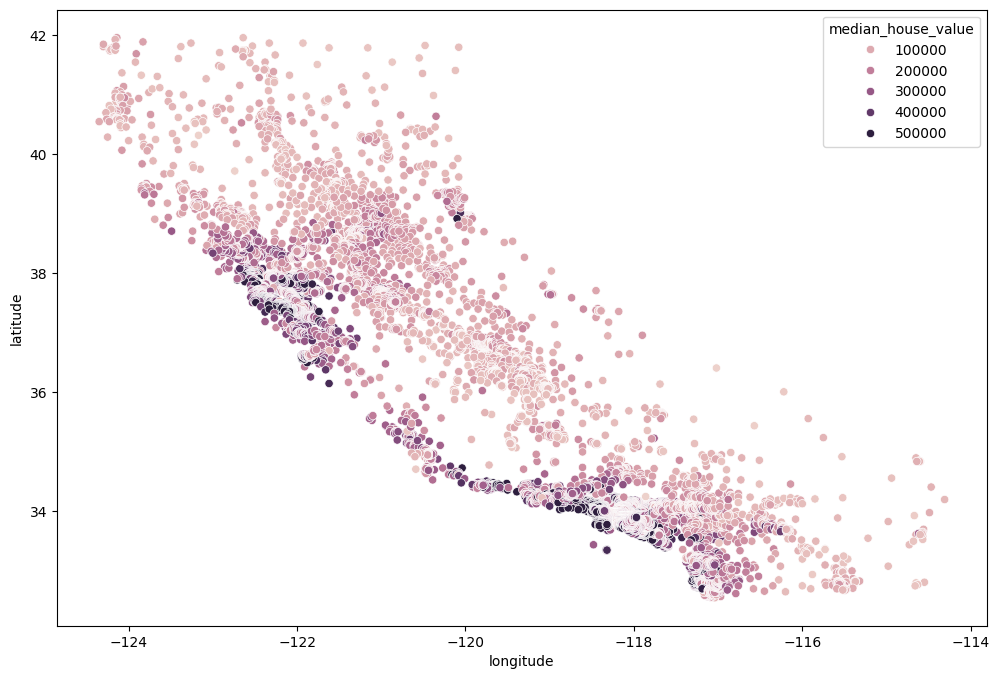

In [ ]:
#Not nessecary but can see geopgraphically kind of what it looks like
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df)
plt.show()

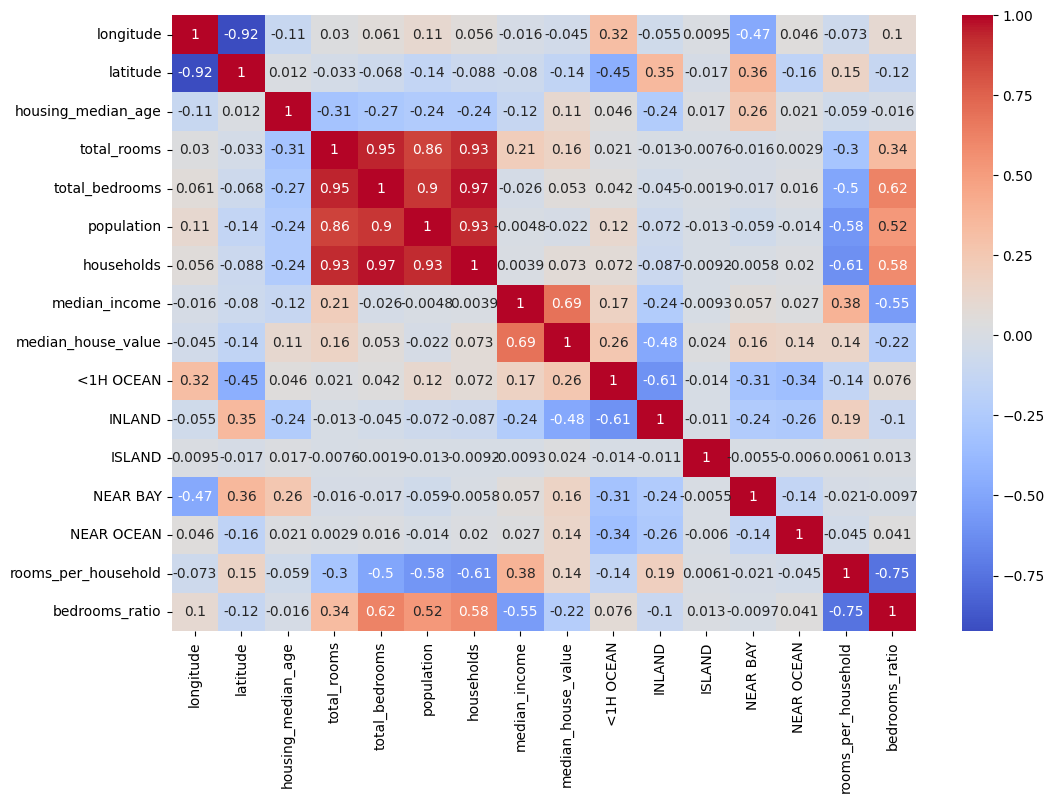

In [ ]:
#based on heatmap we can see insignifcant values such as total rooms. such as total bedrooms effect on median house value
# Feature Engineer better features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms']
#can plot another heatmap and compare new features to originals and see how much more signifcant the features are
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix with new features')
plt.show()


In [ ]:
#Random Forest Model is a version of Ensemble learning
#ensemble learning is taking same algorithim multiple times.
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, y_test)#tests score so 82% accurate

0.8256731991002005

In [ ]:
#GridSearchCV does cross validation for each combination of hyperparamters, and performs k-fold cross validation.
#where the data set is split into k subsets/folds
#model trains on the k-1 folds and tested agiasnt the remaining fold, process is repeated k times each time with a different fold as the validation set
#cross validation scors are averahed to get final performance for each hyperparamter combination
#The resulting model is essentially "tuned," meaning it’s optimized for those hyperparameters.
from sklearn.model_selection import GridSearchCV


forest = RandomForestRegressor()

# Define the parameter grid to search, n_estimators = num of trees, max_features = num features a tree will conisder when splitting
#cv os how many fold cross validaiton will be used (this is the k) data split into 5 subsets, trained on 4, tested on 1, scoring =metric for perfomance
param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}
grid_search = GridSearchCV(forest,param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score =True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test, y_test)
#didnt get much better so lets try finetune, or add more paramters in the paramgrid

0.8274748655615352

In [27]:
#Finetuning trial
forest = RandomForestRegressor()

# Define the parameter grid to search, n_estimators = num of trees, max_features = num features a tree will conisder when splitting
#cv os how many fold cross validaiton will be used (this is the k) data split into 5 subsets, trained on 4, tested on 1, scoring =metric for perfomance
param_grid = {
    "n_estimators": [100,150], #turns out for default RandomForest Regressor n is 100
    "min_samples_split": [2, 5, 10], #how many samples do you need to split
    "max_depth":[None,4,8]
}
grid_search = GridSearchCV(forest,param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score =True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
#from sklearn.ensemble import RandomForestRegressor
#import numpy as np
#import pandas as pd
class CustomRandomForest:
  def __init__(self, n_estimators=150, max_features=8):
    self.model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features)

  def fit(self, X, y):
    self.model.fit(X, y)

  def predict(self, new_data):
    if isinstance(new_data, list):
        new_data = np.array(new_data).reshape(1, -1)  # Convert list to 2D array
    elif new_data.ndim == 1:
        new_data = new_data.reshape(1, -1)  # Convert 1D array to 2D array

    # Make predictions using the trained model
    predictions = self.model.predict(new_data)
    return predictions


test_rf = CustomRandomForest()
test_rf.fit(X_train, y_train)
#Real Listing from Zillow 7065 9th Ave, Tahoma, CA 96142 so not by block but a house so we will see
new_data_point = np.array([
    39.06529284512989,             # Latitude value
    -120.1329069323289,             # longitude value
    20,                    # Median age of the house
    340,                  # Total number of rooms within a block
    170,                   # Total number of bedrooms within a block
    136,                   # Total number of people in the block
    34,                   # Total number of households in the block
    14,                   # Median income in tens of thousands
    0,                     # NEAR BAY (one-hot encoded; 1 indicates presence of this category)
    1,                     # NEAR OCEAN (one-hot encoded; 0 indicates absence of this category)
    0,
    0,
    0# ISLAND (one-hot encoded; 0 indicates absence of this category)
])  # Replace with actual values

# Make a prediction
prediction = test_rf.predict(new_data_point)

# Print the predicted value
print("Predicted value:", prediction)




Predicted value: [389232.23333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
